In [13]:
import pipeline.pipeline as pipeline
import db.knowhere_db as kdb
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
user = 'glen'

In [19]:
fName = r'C:/Users/William/Documents/DataScience/Projects/Knowhere/data/iPhone/aggregate_data/aggregated_{}_sensor2.csv'.format(user)
csv_dir = r'C:/Users/William/Documents/DataScience/Projects/Knowhere/data/iPhone/incoming/'
processed_dir = r'C:/Users/William/Documents/DataScience/Projects/Knowhere/data/iPhone/processed/'

In [20]:
user_df = pipeline.iphone(username=user, file_with_path=fName, dir_to_aggregate=csv_dir, processed_dir=processed_dir)

In [21]:
writer = kdb.Writer('knowhere')
writer.write_dataframe_to_collection(df=user_df, collection='iphone_test')

In [ ]:
reader = kdb.Reader('knowhere')
rdf = reader.get_dataframe_unrolled(collection='iphone_temp',user_id='58c5b91d71a9e82f33ad1668',sensor='GPS')
rdf[0:10]

In [97]:
reader = kdb.Reader('knowhere')
rdf = reader.get_dataframe_pivoted(collection='iphone_test', user_id='58c5b91d71a9e82f33ad1669', sensor='Gravity',
                                  min_date='2017-03-09', max_date='2017-03-10')
rdf[0:10]

sensor_name,Gravity (x),Gravity (y),Gravity (z)
timestamp,,,
2017-03-09 08:09:30,-0.075368,-0.884461,-0.460486
2017-03-09 08:09:34,-0.122271,-0.952033,-0.280504
2017-03-09 08:25:06,-0.304907,-0.861071,-0.406926
2017-03-09 08:25:10,-0.199437,-0.919495,-0.338752
2017-03-09 08:25:14,-0.165412,-0.896206,-0.411647
2017-03-09 08:25:19,-0.085235,-0.914496,-0.395516
2017-03-09 08:25:23,-0.126737,-0.900505,-0.415966
2017-03-09 08:41:43,-0.126815,-0.898776,-0.419666
2017-03-09 08:41:47,0.151766,-0.464378,-0.872536


In [73]:
rdf.astype(float,raise_on_error=False)
rdf = rdf[rdf['Gravity (z)'] < -0.9]

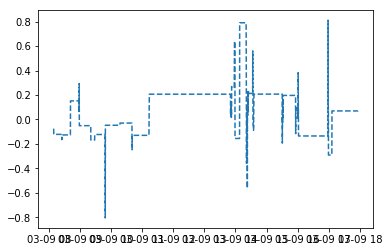

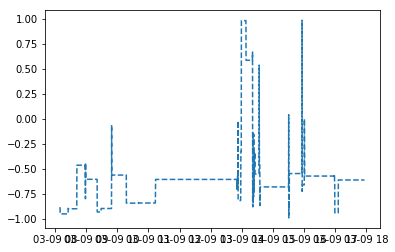

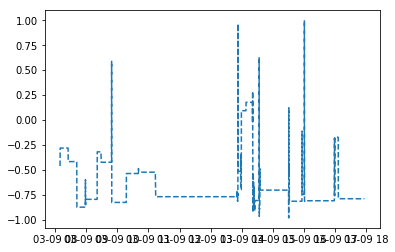

In [106]:
import dateutil
import numpy as np

rdf2 = rdf.copy()

rdf2 = rdf2.asfreq('1s', method='pad')

rdf2 = rdf2.asfreq('15s')
xs = rdf2.index.tolist()

for c in xrange(len(rdf2.columns)):
    ys = rdf2.iloc[:, c]
    #ys = np.convolve(ys, [0.2, 0.2, 0.2, 0.2, 0.2] ,'same')
    plt.plot(xs,ys,'--')
    plt.show()